In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
metro_data = pd.read_csv('/Users/camilledunning/Downloads/metro_data.csv')

In [143]:
import datetime

new_york_data = metro_data.loc[metro_data['MetroName'] == 'New York, NY']
new_york_data = new_york_data.loc[pd.to_datetime(new_york_data['Date']).dt.year >= 2010]
ny_dates = pd.to_datetime(new_york_data['Date']).dt.year

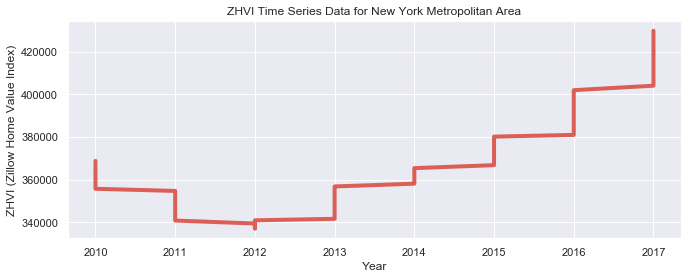

In [144]:
ny_zhvi = new_york_data['ZHVI_AllHomes']

sns.set(palette = 'hls', rc = {'figure.figsize':(11, 4)})

def gen_plot(title, x, y, x_data, y_data, lw):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(x_data, y_data, lw = lw)

gen_plot('ZHVI Time Series Data for New York Metropolitan Area', 
         'Year', 
         'ZHVI (Zillow Home Value Index)',
         ny_dates, 
         ny_zhvi, 
         4)

Text(0, 0.5, 'Median Listing Price')

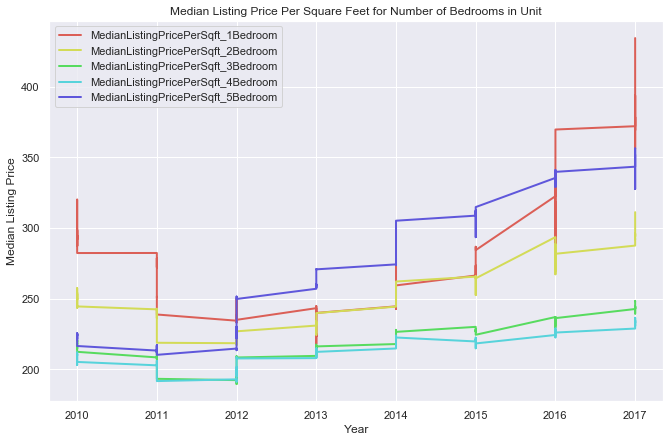

In [145]:
mlp_sqft_ny = [new_york_data['MedianListingPricePerSqft_1Bedroom'],
new_york_data['MedianListingPricePerSqft_2Bedroom'],
new_york_data['MedianListingPricePerSqft_3Bedroom'],
new_york_data['MedianListingPricePerSqft_4Bedroom'],
new_york_data['MedianListingPricePerSqft_5BedroomOrMore']]

sns.set(palette = 'hls', style = 'darkgrid', rc = {'figure.figsize':(11, 7)})

fig, ax = plt.subplots()
for i in range(len(mlp_sqft_ny)):
    ax.plot(ny_dates, mlp_sqft_ny[i], lw = 2, label = 'MedianListingPricePerSqft_' + str(i + 1) + 'Bedroom')
    plt.legend()

plt.title('Median Listing Price Per Square Feet for Number of Bedrooms in Unit')
plt.xlabel('Year')
plt.ylabel('Median Listing Price')

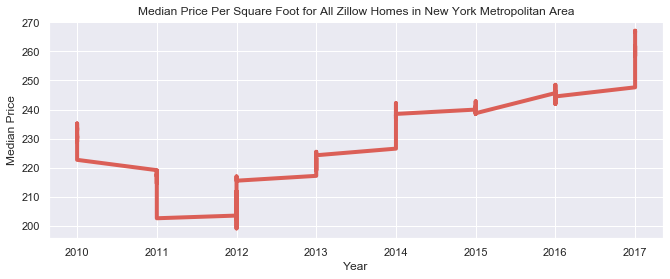

In [146]:
mlp_allhomes = new_york_data['MedianListingPricePerSqft_AllHomes']

sns.set(palette = 'hls', rc = {'figure.figsize':(11, 4)})

gen_plot('Median Price Per Square Foot for All Zillow Homes in New York Metropolitan Area',
        'Year',
        'Median Price',
        ny_dates,
        mlp_allhomes,
        4)

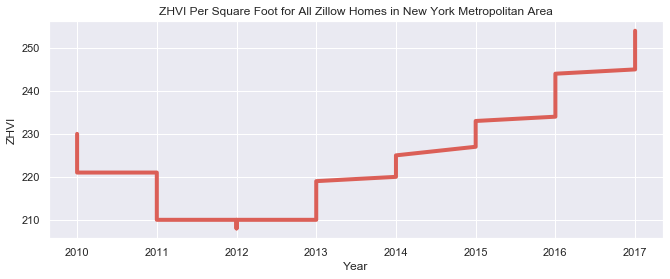

In [147]:
zhvi_sqft_allhomes = new_york_data['ZHVIPerSqft_AllHomes']
gen_plot('ZHVI Per Square Foot for All Zillow Homes in New York Metropolitan Area',
        'Year',
        'ZHVI',
        ny_dates,
        zhvi_sqft_allhomes,
        4)

Text(0, 0.5, 'ZHVI')

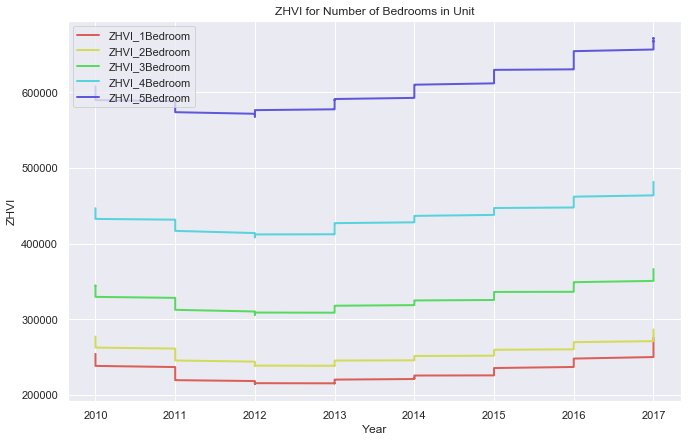

In [148]:
zhvi_sqft_ny = [new_york_data['ZHVI_1bedroom'],
new_york_data['ZHVI_2bedroom'],
new_york_data['ZHVI_3bedroom'],
new_york_data['ZHVI_4bedroom'],
new_york_data['ZHVI_5BedroomOrMore']]

sns.set(palette = 'hls', style = 'darkgrid', rc = {'figure.figsize':(11, 7)})

fig, ax = plt.subplots()
for i in range(len(zhvi_sqft_ny)):
    ax.plot(ny_dates, zhvi_sqft_ny[i], lw = 2, label = 'ZHVI_' + str(i + 1) + 'Bedroom')
    plt.legend()

plt.title('ZHVI for Number of Bedrooms in Unit')
plt.xlabel('Year')
plt.ylabel('ZHVI')